# **🌍 Zetta Lab 2025, Desafio 01: Ciência e Governança de Dados**


* Participante: Fernando José Gregatti Noronha

* Graduando em Ciência da Computação

* Matrícula: 202120495





# 📌 Objetivos

Realizar análises estatísticas descritivas sobre os dados socioeconômicos e ambientais dos municípios do estado de Pará nos anos de 2000 e 2010, a fim de calcular métricas como média e desvio padrão para variáveis relevantes (desmatamento, IDHM, IVS, renda per capita e população), além de gerar gráficos comparativos e relatórios que auxiliem na compreensão dos dados.

# 🤔 Razão

A análise estatística foi fundamental para identificar padrões, tendências e possíveis correlações entre os indicadores ao longo do tempo. A separação da base de dados por ano permitiu uma comparação mais clara entre 2000 e 2010, enquanto os gráficos e o uso do ProfileReport ofereceram uma visão abrangente da distribuição dos dados, facilitando interpretações e decisões baseadas em evidências.



# 🛠️ 0. Configuração Inicial

Antes de iniciar o processo de tratamento de dados, é importante: (1) garantir que teremos todos os pacotes e bibliotecas necessários para trabalhar em cima das bases de dados e (2) entender a estrutura e formatação dos dados, considerando que há duas bases de dados distintas. Sendo assim:

In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7197cce650b03f12fc5e04b2e5623e4320eca2bddefccaeee905fa7884e31add
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
from google.colab import files
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🔋 1. Carregando e Compreendendo os Dados

In [4]:
# --- LEITURA DO DATABASE I ---
# Força a leitura de tudo como string para evitar interpretações erradas (como datas)
url = 'https://raw.githubusercontent.com/NandoGregatti/Zetta-Lab-2025-Desafio-01-Ci-ncia-e-Governan-a-de-Dados/91afce10d882f621a532c7253b1d6ef3265fd9af/Desmatamento_Para_2000e2010.xlsx'
df_desmatamento = pd.read_excel(url, engine='openpyxl', dtype=str) # Lido como string para efetuar tratamento de valores

# --- LEITURA DO DATABASE II ---
# Força a leitura de tudo como string para evitar interpretações erradas (como datas)
url = 'https://raw.githubusercontent.com/NandoGregatti/Zetta-Lab-2025-Desafio-01-Ci-ncia-e-Governan-a-de-Dados/91afce10d882f621a532c7253b1d6ef3265fd9af/Vulnerabilidade_Para_2000e2010.xlsx'
df_vulnerabilidade = pd.read_excel(url, engine='openpyxl', dtype=str)

# --- EXIBIÇÃO ---
# Exibir as 5 primeiras linhas de cada base
print("Desmatamento - primeiras 5 linhas:")
display(df_desmatamento.head())

print("\nVulnerabilidade - primeiras 5 linhas:")
display(df_vulnerabilidade.head())

Desmatamento - primeiras 5 linhas:


,ano,id_municipio,id_municipio_nome,bioma,area_total,desmatado,vegetacao_natural
0,2000,1500107,Abaetetuba,Amazônia,16285588,130.6,1076.5
1,2010,1500107,Abaetetuba,Amazônia,16285588,691.3,515.8
2,2010,1500131,Abel Figueiredo,Amazônia,59862432,548.6,50
3,2000,1500131,Abel Figueiredo,Amazônia,59862432,509.9,88.7
4,2000,1500206,Acará,Amazônia,435310954,1877.1,2367-08-01 00:00:00



Vulnerabilidade - primeiras 5 linhas:


,ano,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,raca_cor,sexo,localizacao,ivs,idhm,prosperidade_social,renda_per_capita,proporcao_vulneravel,taxa_envelhecimento,populacao_total
0,2010,PA,Pará,1500107,Abaetetuba,total,total,total,464,628,baixo,293.01,65.93,4.91,450113
1,2000,PA,Pará,1500107,Abaetetuba,total,total,total,582,0.5,muito baixo,206.84,83.11,3.93,369589
2,2000,PA,Pará,1500131,Abel Figueiredo,total,total,total,603,508,muito baixo,317.56,63.32,3.81,18635
3,2010,PA,Pará,1500131,Abel Figueiredo,total,total,total,422,622,baixo,390.12,58.48,5.31,21158
4,2000,PA,Pará,1500206,Acará,total,total,total,705,0.35,muito baixo,160.07,87.28,3.93,157702


Com base na análise inicial, identificou-se que o banco de dados referente ao desmatamento é composto por sete colunas: ano, id_municipio, id_municipio_nome, bioma, area_total, desmatado e vegetacao_natural.

Paralelamente, o banco de dados com informações socioeconômicas apresenta as seguintes colunas: ano, sigla_uf, sigla_uf_nome, id_municipio, id_municipio_nome, raca_cor, sexo, localizacao, ivs, idhm, prosperidade_social, renda_per_capita, proporcao_vulneravel, taxa_envelhecimento e populacao_total.

Dessa forma, compreende-se que ambos os conjuntos de dados demandam um pré-processamento adequado antes da realização de análises mais aprofundadas. Ademais, será realizada a integração das duas bases em um único banco de dados, processo que será descrito em detalhes nas seções seguintes.

# 🧼 2. Leitura e Tratamento de Dados

Agora que os pacotes e bibliotecas necessárias foram instalados e a leitura dos dados foi feita, é preciso realizar o tratamento de dados em cima dessas suas bases para garantir a consistência, integridade e usabilidade das informações na análise. A seguir, descrevemos cada subetapa envolvida nesse processo:

1. Conversão de tipos de dados: Ao manipular essas bases de dados, alguns problemas relacionados à interpretação automática dos tipos de dados pelo pandas surgiram. Algumas colunas estão tendo valores perdidos dada a conversão automática que o pandas faz. Para solucionar esse problema, todos os dados foram armazenados como strings e, feito isso, foram convertidos para os tipos correspondentes.

2. Remoção de colunas: Algumas colunas que não agregam valor à análise foram removidas. Isso ajuda a simplificar os próximos passos.

3. Renomeio de colunas: Para facilitar o entendimento e manter consistência entre as bases, os nomes das colunas foram padronizados.

4. Remoção de duplicatas, caso necessário: Foi verificada a existência de linhas duplicadas em uma das bases, e essas duplicatas foram removidas. Isso evita distorções nos resultados, como contagem duplicada de municípios ou áreas.

Os passos de 1 à 4 foram aplicados as duas bases de dados individualmente. No entanto, é preciso tratar esses dados um pouco mais para que fiquem prontos para a análise exploratória. Sendo assim, é importante seguir os demais passos:

5. Junção das bases de dados: As diferentes bases, contendo variáveis socioeconômicas e ambientais, foram unificadas em uma única base através de operações de junção (merge), com base em colunas comuns como ano e municipio. Esse processo permite a correlação direta entre os dados ao longo das análises.

6. Verificações extras: Feita a junção, é importante verificar se existe correspondência entre os municípios, se existem ainda duplicatas ou se existem valores nulos ou incorretos na base principal.

🌳 Cuidaremos, a princípio, da base de dados de desmatamento. Sendo assim, devemos efetuar os seguintes passos para esse conjunto de dados:

1. Conversão de tipo: A base de dados foi lida inteira como string. É comum que a biblioteca "pandas" faça conversão errada de dados quando a leitura é feita automaticamente. Para não termos esse problema e conseguirmos tratarmos facilmente os dados, lê-se os mesmos como strings e depois efetuamos a conversão.

* Os dados de "ano" serão representado por números inteiros.
* Os dados de "id_municipio", "id_municipio_nome" e "bioma" serão representados por strings.
* Os dados de "area_total", "desmatado" e "vegetacao_natural" devem ser convertidos para inteiro e pontos flutuantes, porém, esse tratamento deve ser feito cuidadosamente. Isso decorre porque a formatação desses dados no conjunto de dados precisa ser tratado.  


2. Remoção de colunas: A coluna id_municipio não será usada durante as análises futuras e a junção das bases de dados será feita com base em outras colunas. Portanto, iremos removê-la.

3. Renomeio de colunas: A coluna id_municipio_nome será renomeada apenas para "municipio" a fim de simplificar a extensão do nome, que é desnecessária.

4. Verificação de duplicatas: Devemos considerar as variáveis de "municipio", "ano" e "bioma" para verificar se há duplicação de linhas. O retorno deve exibir uma tabela vazia.

In [5]:
# --- LEITURA DO DATABASE I ---
# Força a leitura de tudo como string para evitar interpretações erradas (como datas)
url = 'https://raw.githubusercontent.com/NandoGregatti/Zetta-Lab-2025-Desafio-01-Ci-ncia-e-Governan-a-de-Dados/91afce10d882f621a532c7253b1d6ef3265fd9af/Desmatamento_Para_2000e2010.xlsx'
df_desmatamento = pd.read_excel(url, engine='openpyxl', dtype=str) # Lido como string para efetuar tratamento de valores

# --- CONVERSÕES DE TIPO ---
df_desmatamento['ano'] = df_desmatamento['ano'].astype(int)
df_desmatamento['id_municipio'] = df_desmatamento['id_municipio'].astype(str)
df_desmatamento['id_municipio_nome'] = df_desmatamento['id_municipio_nome'].astype(str)
df_desmatamento['bioma'] = df_desmatamento['bioma'].astype(str)

# area_total: remover pontos de milhar
df_desmatamento['area_total'] = (
    df_desmatamento['area_total']
    .str.replace('.', '', regex=False)
    .astype(int)
)

# desmatado: manter apenas números e o ponto decimal
df_desmatamento['desmatado'] = (
    df_desmatamento['desmatado']
    .str.extract(r'(\d+\.\d+|\d+)', expand=False)  # captura número decimal ou inteiro
    .astype(float)
)

# vegetacao_natural: mesmo tratamento
df_desmatamento['vegetacao_natural'] = (
    df_desmatamento['vegetacao_natural']
    .str.extract(r'(\d+\.\d+|\d+)', expand=False)
    .astype(float)
)

# --- AJUSTES EM COLUNAS ---
# Remove coluna 'id_municipio' se existir
if 'id_municipio' in df_desmatamento.columns:
    df_desmatamento.drop(columns=['id_municipio'], inplace=True)

# Renomeia 'municipio nome' para 'municipio'
df_desmatamento.rename(columns={'id_municipio_nome': 'municipio'}, inplace=True)


# --- VERIFICAÇÃO DE DUPLICATAS ---
duplicatas = df_desmatamento.duplicated(subset=["ano", "municipio", "bioma"], keep=False)
df_desmatamento[duplicatas]

,ano,municipio,bioma,area_total,desmatado,vegetacao_natural


📰 A seguir, devemos cuidar da base de dados socieconomicos. Para isso, seguiremos os seguintes passos:

1. Conversão de tipo: A base de dados foi lida inteira como string pelo mesmo motivo descrito na base de dados anterior. Sendo assim, temos que:

* Os dados de "ano" serão representado por números inteiros.
* Os dados de "id_municipio", "id_municipio_nome", "sigla_uf_nome" e "prosperidade_social" serão representados por strings.
* Os dados de "ivs", "idhm", "renda_per_capita" e "populacao" devem ser convertidos para inteiro e pontos flutuantes, porém, esse tratamento deve ser feito cuidadosamente. Isso decorre porque a formatação desses dados no conjunto de dados precisa ser tratado.  


2. Remoção de colunas: As colunas "sexo", "raca", "localizacao", "id_municipio", "proporcao_vulneravel" e "taxa_envelhecimento" não serão usadas na análise e, por isso, podem ser removidas da base de dados.

3. Renomeio de colunas: A coluna id_municipio_nome será renomeada apenas para "municipio" a fim de simplificar a extensão do nome, que é desnecessária.

4. Verificação de duplicatas: Devemos considerar as variáveis de "municipio" e "ano" para verificar se há duplicação de linhas. O retorno deve exibir uma tabela vazia.

In [6]:
# --- LEITURA DO DATABASE ---
# Força a leitura de tudo como string para evitar interpretações erradas (como datas)
url = 'https://raw.githubusercontent.com/NandoGregatti/Zetta-Lab-2025-Desafio-01-Ci-ncia-e-Governan-a-de-Dados/91afce10d882f621a532c7253b1d6ef3265fd9af/Vulnerabilidade_Para_2000e2010.xlsx'
df_vulnerabilidade = pd.read_excel(url, engine='openpyxl', dtype=str)

# --- CONVERSÕES DE TIPO ---
# Conversões básicas para a base de vulnerabilidade
df_vulnerabilidade['ano'] = df_vulnerabilidade['ano'].astype(int)
df_vulnerabilidade['sigla_uf_nome'] = df_vulnerabilidade['sigla_uf_nome'].astype(str)
df_vulnerabilidade['id_municipio_nome'] = df_vulnerabilidade['id_municipio_nome'].astype(str)
df_vulnerabilidade['id_municipio'] = df_vulnerabilidade['id_municipio'].astype(str)
df_vulnerabilidade['prosperidade_social'] = df_vulnerabilidade['prosperidade_social'].astype(str)

# Tratamento específico das colunas com valores numéricos
# Remove os pontos de milhar e troca a vírgula por ponto para valores decimais
df_vulnerabilidade['ivs'] = df_vulnerabilidade['ivs'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.extract(r'(\d+\.\d+|\d+)', expand=False)
df_vulnerabilidade['ivs'] = df_vulnerabilidade['ivs'].astype(float)

df_vulnerabilidade['idhm'] = df_vulnerabilidade['idhm'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.extract(r'(\d+\.\d+|\d+)', expand=False)
df_vulnerabilidade['idhm'] = df_vulnerabilidade['idhm'].astype(float)

df_vulnerabilidade['renda_per_capita'] = df_vulnerabilidade['renda_per_capita'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).str.extract(r'(\d+\.\d+|\d+)', expand=False)
df_vulnerabilidade['renda_per_capita'] = df_vulnerabilidade['renda_per_capita'].astype(float)

# Coluna de população total já pode ser convertida diretamente como inteiro
df_vulnerabilidade['populacao_total'] = df_vulnerabilidade['populacao_total'].astype(int)

# --- AJUSTES EM COLUNAS ---
# Remove colunas indesejadas se existirem
colunas_para_remover = ['sexo', 'raca_cor', 'localizacao', 'id_municipio', 'proporcao_vulneravel', 'taxa_envelhecimento']
df_vulnerabilidade.drop(columns=[col for col in colunas_para_remover if col in df_vulnerabilidade.columns], inplace=True)

# Identifica colunas numéricas, exceto 'ano'
colunas_numericas = df_vulnerabilidade.select_dtypes(include=['float', 'int']).columns.difference(['ano'])

# Renomeia 'id_municipio_nome' para 'municipio'
df_vulnerabilidade.rename(columns={'id_municipio_nome': 'municipio'}, inplace=True)

# --- REMOÇÃO DE DUPLICATAS ---
# Identifica colunas numéricas, exceto 'ano'
colunas_numericas = df_vulnerabilidade.select_dtypes(include=['float', 'int']).columns.difference(['ano'])

# Agrupa por ano e municipio e calcula média das colunas numéricas
df_vulnerabilidade = (
    df_vulnerabilidade
    .groupby(['ano', 'municipio'], as_index=False)
    .agg({
        **{col: 'mean' for col in colunas_numericas},
        'prosperidade_social': 'first'
    })
)

duplicatas_restantes = df_vulnerabilidade.duplicated(subset=["ano", "municipio"], keep=False)
df_vulnerabilidade[duplicatas_restantes]

,ano,municipio,idhm,ivs,populacao_total,renda_per_capita,prosperidade_social


Agora que já fizemos o processamento e tratamento básico dos dados é importante visualizá-los novamente para entender se estão devidamente formatados.

In [7]:
# --- EXIBIÇÃO ---
# Exibir as 5 primeiras linhas de cada base
print("Desmatamento - primeiras 5 linhas:")
display(df_desmatamento.head())

print("\nVulnerabilidade - primeiras 5 linhas:")
display(df_vulnerabilidade.head())

Desmatamento - primeiras 5 linhas:


,ano,municipio,bioma,area_total,desmatado,vegetacao_natural
0,2000,Abaetetuba,Amazônia,16285588,130.6,1076.5
1,2010,Abaetetuba,Amazônia,16285588,691.3,515.8
2,2010,Abel Figueiredo,Amazônia,59862432,548.6,50.0
3,2000,Abel Figueiredo,Amazônia,59862432,509.9,88.7
4,2000,Acará,Amazônia,435310954,1877.1,2367.0



Vulnerabilidade - primeiras 5 linhas:


,ano,municipio,idhm,ivs,populacao_total,renda_per_capita,prosperidade_social
0,2000,Abaetetuba,5.0,582.0,369589.0,20684.0,muito baixo
1,2000,Abel Figueiredo,508.0,603.0,18635.0,31756.0,muito baixo
2,2000,Acará,35.0,705.0,157702.0,16007.0,muito baixo
3,2000,Afuá,33.0,75.0,86704.0,14725.0,muito baixo
4,2000,Alenquer,432.0,717.0,145423.0,16511.0,muito baixo


Com as bases devidamente lidas, armazenadas e submetidas ao tratamento inicial, procede-se à etapa de unificação dos dados. Para isso, será realizada a junção das bases de desmatamento e vulnerabilidade social a partir das colunas em comum: ano e município. Essas colunas servirão como chave para garantir o alinhamento correto das informações entre os conjuntos de dados.

In [8]:
# --- JUNÇÃO DAS BASES PELO MUNICÍPIO E ANO ---
df_completo = pd.merge(df_desmatamento, df_vulnerabilidade, on=['ano', 'municipio'], how='inner')

# Exibindo novamente para verificar
display(df_completo.head(20))

,ano,municipio,bioma,area_total,desmatado,vegetacao_natural,idhm,ivs,populacao_total,renda_per_capita,prosperidade_social
0,2000,Abaetetuba,Amazônia,16285588,130.6,1076.5,5.000000,582.000000,369589.000000,20684.000000,muito baixo
1,2010,Abaetetuba,Amazônia,16285588,691.3,515.8,628.000000,464.000000,450113.000000,29301.000000,baixo
2,2010,Abel Figueiredo,Amazônia,59862432,548.6,50.0,622.000000,422.000000,21158.000000,39012.000000,baixo
3,2000,Abel Figueiredo,Amazônia,59862432,509.9,88.7,508.000000,603.000000,18635.000000,31756.000000,muito baixo
4,2000,Acará,Amazônia,435310954,1877.1,2367.0,35.000000,705.000000,157702.000000,16007.000000,muito baixo
5,2010,Acará,Amazônia,435310954,2300.0,1944.0,506.000000,607.000000,165888.000000,19934.000000,muito baixo
6,2010,Afuá,Amazônia,85151183,2025.0,5480.0,489.000000,728.000000,106611.000000,16398.000000,muito baixo
7,2000,Afuá,Amazônia,85151183,2025.0,5489.0,33.000000,75.000000,86704.000000,14725.000000,muito baixo
8,2000,Alenquer,Amazônia,2362324261,2143.0,18254.2,432.000000,717.000000,145423.000000,16511.000000,muito baixo
9,2010,Alenquer,Amazônia,2362324261,2391.0,18005.9,564.000000,57.000000,161130.000000,21533.000000,muito baixo


A primeira etapa de validação consiste em verificar se há municípios presentes em apenas uma das bases de dados. Para isso, foi utilizada uma análise da quantidade de valores nulos (NaN) em cada coluna da base df_completo. Caso houvesse um agrupamento de valores ausentes restrito às colunas oriundas de uma das bases, isso indicaria uma possível falha na correspondência entre os municípios. No entanto, tal situação não foi identificada, o que confirma a consistência na junção dos dados.

In [9]:
# --- VERIFICAÇÕES EXTRAS I ---
# Verificando se há municípios que existem numa base e não na outra
print(df_completo.isna().sum())

ano                    0
municipio              0
bioma                  0
area_total             0
desmatado              0
vegetacao_natural      0
idhm                   0
ivs                    0
populacao_total        0
renda_per_capita       0
prosperidade_social    0
dtype: int64


Como verificação complementar, foi avaliada a presença de registros duplicados na base integrada. Esta análise considerou as colunas ano, município e bioma, sendo esta última incluída por representar um fator geográfico relevante — visto que um mesmo município pode abranger mais de um bioma. A inclusão dessa variável garante que registros legítimos não sejam equivocadamente classificados como duplicados. Os resultados demonstraram que as duplicatas foram devidamente tratadas nas etapas anteriores.

In [10]:
# --- VERIFICAÇÕES EXTRAS II ---
# Verifica quantas duplicatas existem antes
duplicatas_antes = df_completo.duplicated(subset=['ano', 'municipio', 'bioma']).sum()
print(f"Duplicatas antes do tratamento: {duplicatas_antes}")

Duplicatas antes do tratamento: 0


Por fim, foi realizada uma última checagem para identificar a existência de quaisquer valores nulos nas colunas da base consolidada. O procedimento confirmou a ausência desses valores, permitindo assim que as etapas seguintes da análise sejam conduzidas com segurança e integridade dos dados.

In [11]:
# --- VERIFICAÇÕES EXTRAS III ---
# Verifica a existência de valores nulos
df_completo.isnull().sum()

,0
ano,0
municipio,0
bioma,0
area_total,0
desmatado,0
vegetacao_natural,0
idhm,0
ivs,0
populacao_total,0
renda_per_capita,0


# 📈 3. Análise Estatística + Dashboard

Nesta etapa do estudo, foram conduzidas análises estatísticas descritivas com o intuito de compreender com maior profundidade os dados socioeconômicos e ambientais dos municípios nos anos de 2000 e 2010. Inicialmente, foram calculadas medidas de tendência central e de dispersão, especificamente a média e o desvio padrão, para as variáveis: área desmatada, Índice de Desenvolvimento Humano Municipal (IDHM), Índice de Vulnerabilidade Social (IVS), renda per capita e população.

Adicionalmente, foram elaborados gráficos comparativos que ilustram, para cada município, as variações observadas nessas variáveis entre os dois anos analisados. Esses recursos visuais possibilitaram a identificação de padrões, tendências e possíveis relações entre os indicadores ao longo do tempo.

Por fim, foi gerado um relatório de correlação com o objetivo de explorar as relações estatísticas entre as variáveis presentes na base de dados, contribuindo para a interpretação integrada dos fatores socioeconômicos e ambientais analisados.

Inicialmente, a base de dados foi segmentada por ano, a fim de facilitar o tratamento e a análise das informações. Após essa separação, foram calculadas, para cada ano, as medidas de média e desvio padrão das variáveis previamente mencionadas, permitindo uma análise estatística comparativa entre os períodos de 2000 e 2010.

In [12]:
# --- SEPARANDO BASE DE DADOS POR ANO ---
df_2000 = df_completo[df_completo['ano'] == 2000]
df_2010 = df_completo[df_completo['ano'] == 2010]

In [13]:
# Agrupar soma do desmatamento por município e calcular média e desvio padrão
desmatado_2000 = df_2000.groupby('municipio')['desmatado'].sum()
desmatado_2010 = df_2010.groupby('municipio')['desmatado'].sum()

media_desmatado_2000 = desmatado_2000.mean()
dp_desmatado_2000 = desmatado_2000.std()

media_desmatado_2010 = desmatado_2010.mean()
dp_desmatado_2010 = desmatado_2010.std()

print(f"Desmatamento em 2000 - Média: {media_desmatado_2000:.2f}km², Desvio Padrão: {dp_desmatado_2000:.2f}")
print(f"Desmatamento em 2010 - Média: {media_desmatado_2010:.2f}km², Desvio Padrão: {dp_desmatado_2010:.2f}")

Desmatamento em 2000 - Média: 1333.65km², Desvio Padrão: 1351.03
Desmatamento em 2010 - Média: 1778.64km², Desvio Padrão: 2218.38


📝 O aumento da média de desmatamento entre 2000 e 2010 (de 1333.65 km² para 1778.64 km²) indica que houve um crescimento significativo na área desmatada. O desvio padrão mais alto em 2010 (2218.38) sugere uma maior variação entre os municípios no que se refere ao desmatamento, com alguns municípios apresentando desmatamentos muito maiores que a média.

In [14]:
variaveis = ['idhm', 'ivs', 'renda_per_capita']

for var in variaveis:
    media_2000 = df_2000[var].mean()
    dp_2000 = df_2000[var].std()
    media_2010 = df_2010[var].mean()
    dp_2010 = df_2010[var].std()

    print(f"{var.upper()} em 2000 - Média: {media_2000:.2f}, Desvio Padrão: {dp_2000:.2f}")
    print(f"{var.upper()} em 2010 - Média: {media_2010:.2f}, Desvio Padrão: {dp_2010:.2f}")
    print()

IDHM em 2000 - Média: 373.62, Desvio Padrão: 152.12
IDHM em 2010 - Média: 539.10, Desvio Padrão: 150.27

IVS em 2000 - Média: 593.63, Desvio Padrão: 202.64
IVS em 2010 - Média: 499.29, Desvio Padrão: 152.05

RENDA_PER_CAPITA em 2000 - Média: 22139.67, Desvio Padrão: 11647.47
RENDA_PER_CAPITA em 2010 - Média: 28652.50, Desvio Padrão: 14518.00



📝 O aumento considerável da média do IDHM de 373.62 para 539.10 entre 2000 e 2010 reflete melhorias substanciais nas condições de vida nos municípios analisados, especialmente em termos de educação, saúde e renda. O desvio padrão, embora menor em 2010 (150.27 contra 152.12 em 2000), ainda indica variações significativas entre os municípios, com alguns apresentando desenvolvimentos muito mais acentuados que outros.

📝 A queda na média do IVS de 593.63 em 2000 para 499.29 em 2010 indica uma diminuição na vulnerabilidade social ao longo da década, sugerindo que os municípios podem ter adotado políticas públicas que ajudaram a reduzir as desigualdades sociais. A redução do desvio padrão (de 202.64 para 152.05) também sugere uma certa homogeneização na redução da vulnerabilidade, embora ainda haja variação considerável entre os municípios.

📝 A média da renda per capita cresceu significativamente de 22139.67 em 2000 para 28652.50 em 2010, o que indica uma melhoria econômica nos municípios ao longo da década. O aumento no desvio padrão de 11647.47 para 14518.00 sugere que, embora a renda média tenha aumentado, a distribuição de riqueza pode ter se tornado mais desigual, com algumas áreas apresentando ganhos substanciais enquanto outras não.

In [15]:
# Calcular média e desvio padrão
media_pop_2000 = df_2000['populacao_total'].mean()
dp_pop_2000 = df_2000['populacao_total'].std()

media_pop_2010 = df_2010['populacao_total'].mean()
dp_pop_2010 = df_2010['populacao_total'].std()

# Exibir os resultados
print(f"População total em 2000 - Média: {media_pop_2000:.2f}, Desvio Padrão: {dp_pop_2000:.2f}")
print(f"População total em 2010 - Média: {media_pop_2010:.2f}, Desvio Padrão: {dp_pop_2010:.2f}")

População total em 2000 - Média: 92157.67, Desvio Padrão: 94764.29
População total em 2010 - Média: 117318.15, Desvio Padrão: 119440.17


📝O aumento da média populacional de 92157.67 para 117318.15 entre 2000 e 2010 reflete o crescimento populacional nos municípios durante esse período. O aumento no desvio padrão (de 94764.29 para 119440.17) sugere que, além do crescimento geral, houve grandes variações entre os municípios, com algumas áreas experimentando um crescimento populacional muito mais acentuado que outras.

🛑 Esses resultados sugerem mudanças significativas nos aspectos socioeconômicos e ambientais entre 2000 e 2010, com uma melhoria em indicadores como o IDHM e a renda per capita, embora com variações entre os municípios. O desmatamento e a vulnerabilidade social também mostraram tendências que merecem atenção e acompanhamento contínuo.

A seguir, foram gerados gráficos com o objetivo de comparar o crescimento ou o declínio das variáveis para cada município. Para as variáveis de desmatamento, IVS, IDHM, renda per capita e população, foram elaborados dois gráficos (Parte 1 e Parte 2) para cada uma delas. Esses gráficos visam ilustrar se houve ascensão ou não nos valores ao longo do período analisado na base de dados.

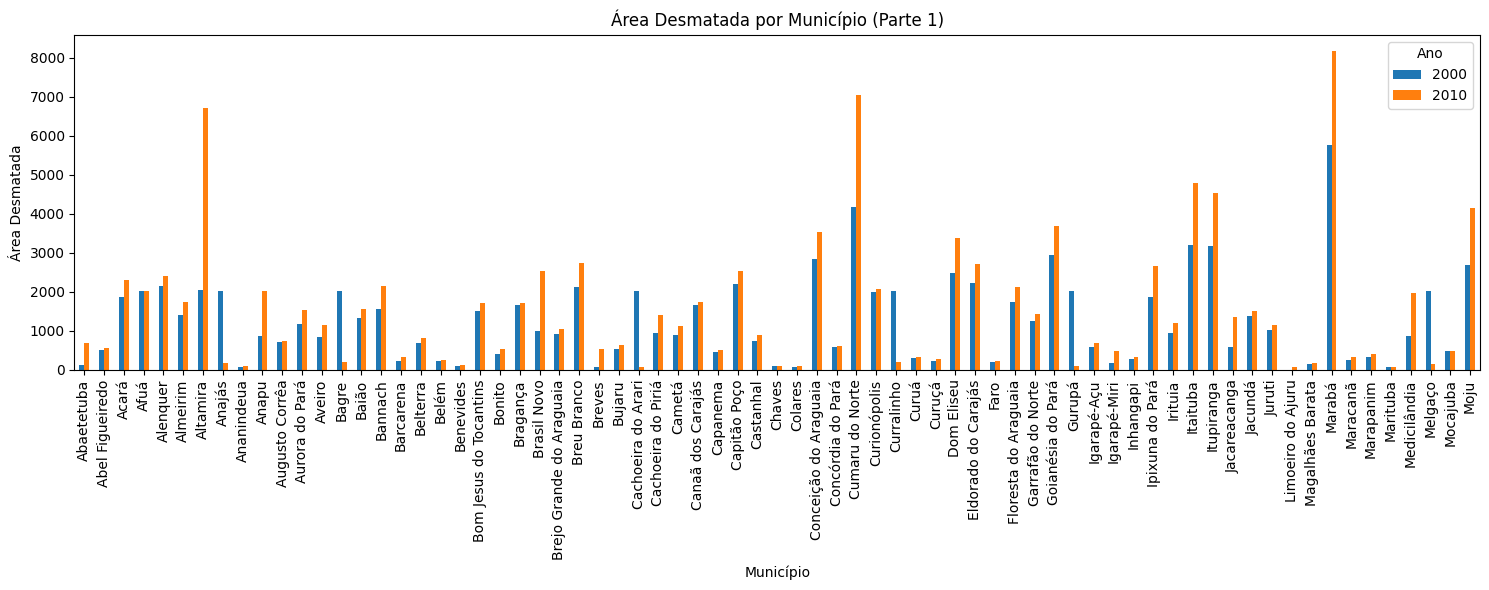

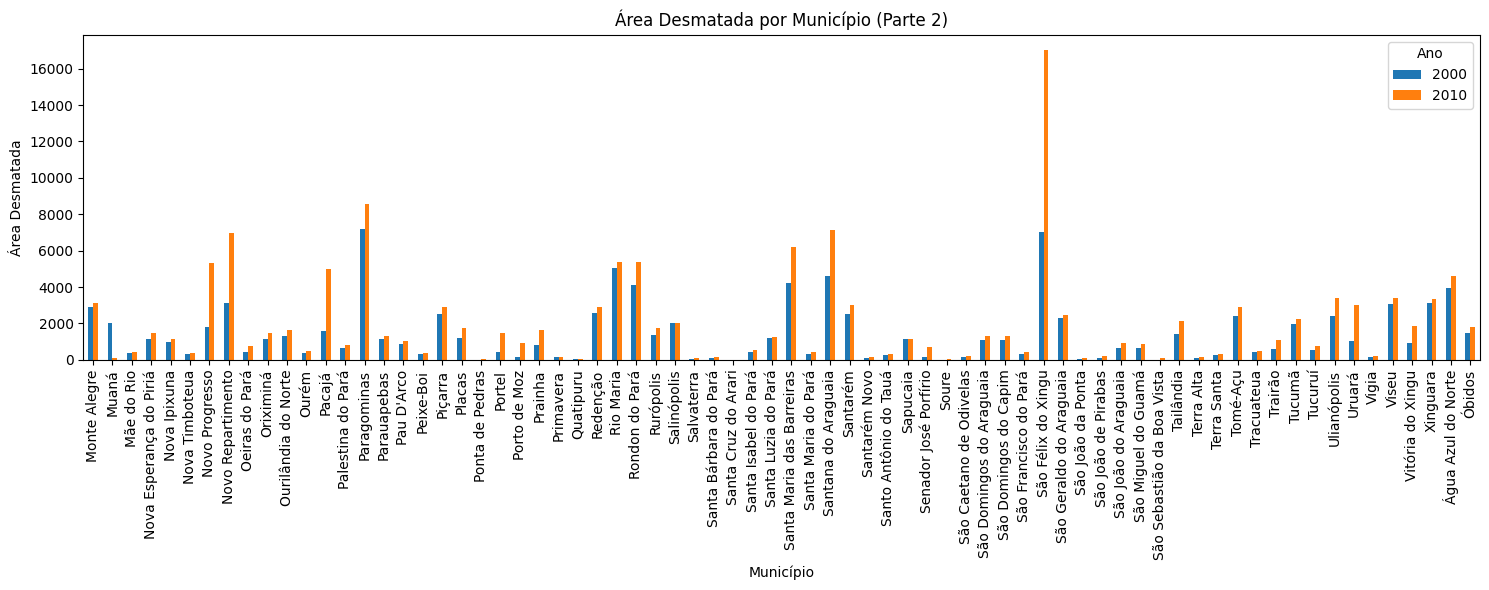

In [16]:
# --- GERAR GRÁFICOS ---
# Agrupar e pivotar como antes
df_desmatado = df_completo.groupby(['municipio', 'ano'])['desmatado'].sum().reset_index()
df_pivot = df_desmatado.pivot(index='municipio', columns='ano', values='desmatado').reset_index()

# Ordenar municípios alfabeticamente (opcional)
df_pivot = df_pivot.sort_values('municipio').reset_index(drop=True)

# Dividir em duas partes
metade = len(df_pivot) // 2
df_parte1 = df_pivot.iloc[:metade]
df_parte2 = df_pivot.iloc[metade:]

# Plotar primeira metade
df_parte1.plot(x='municipio', kind='bar', figsize=(15, 6))
plt.title('Área Desmatada por Município (Parte 1)')
plt.ylabel('Área Desmatada')
plt.xlabel('Município')
plt.xticks(rotation=90)
plt.legend(title='Ano', loc='upper right')
plt.tight_layout()
plt.show()

# Plotar segunda metade
df_parte2.plot(x='municipio', kind='bar', figsize=(15, 6))
plt.title('Área Desmatada por Município (Parte 2)')
plt.ylabel('Área Desmatada')
plt.xlabel('Município')
plt.xticks(rotation=90)
plt.legend(title='Ano', loc='upper right')
plt.tight_layout()
plt.show()


📝A partir da análise dos dados e dos gráficos gerados, observa-se que, na maioria dos municípios, houve um aumento nos níveis de desmatamento entre os anos de 2000 e 2010. Os gráficos revelam uma tendência de expansão da área desmatada em grande parte das localidades analisadas.


Abaixo, iremos gerar gráficos comparativos para as variáveis IDHM, IVS, Renda per capita e População. Sendo assim, vamos analisar os resultados do gráfico:

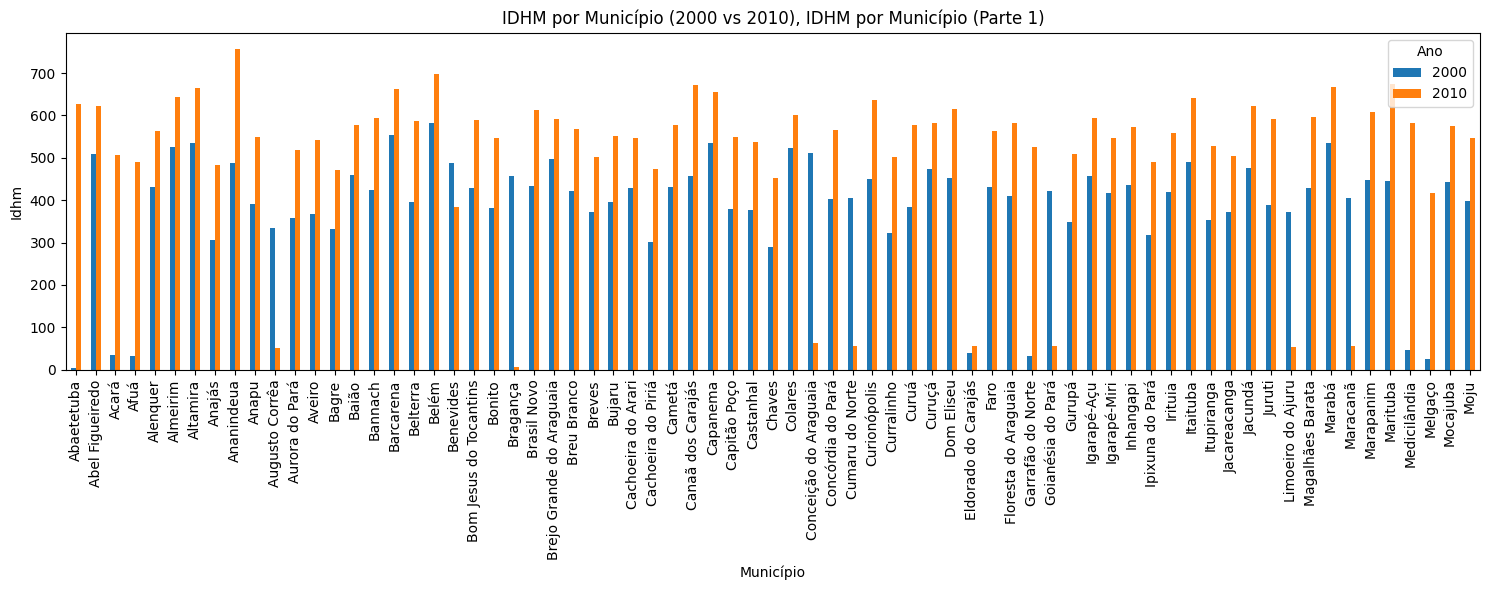

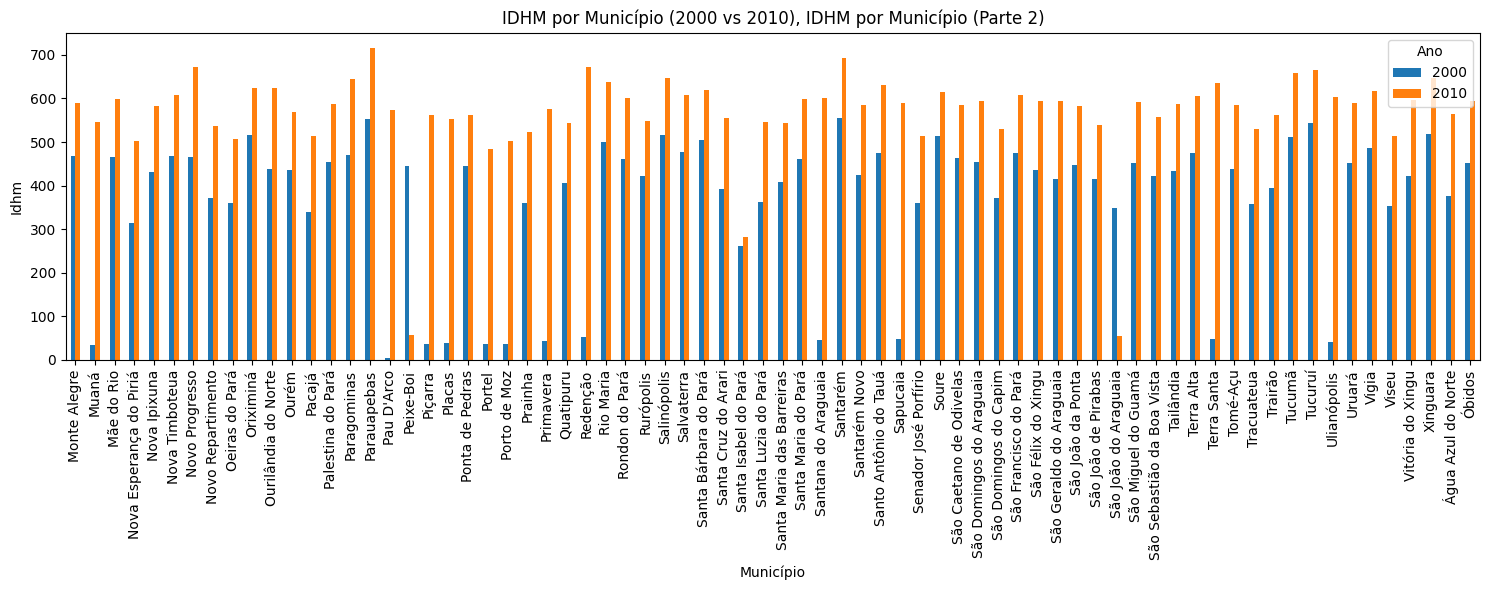

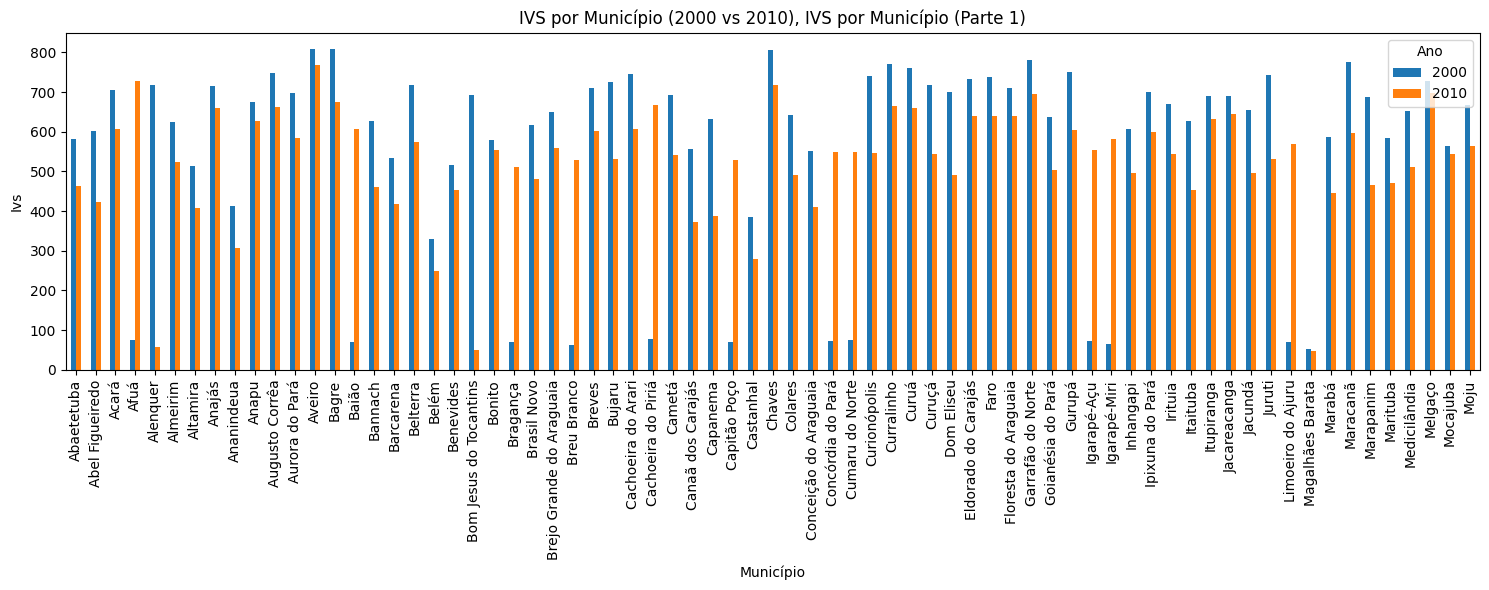

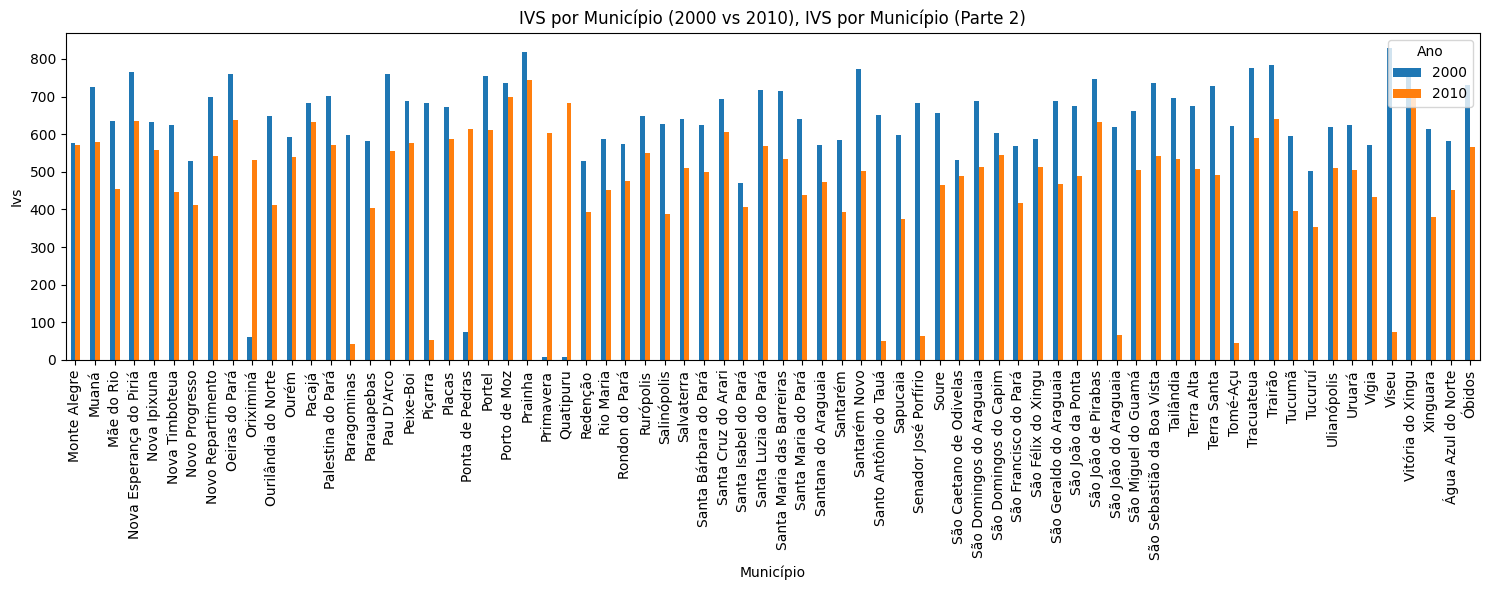

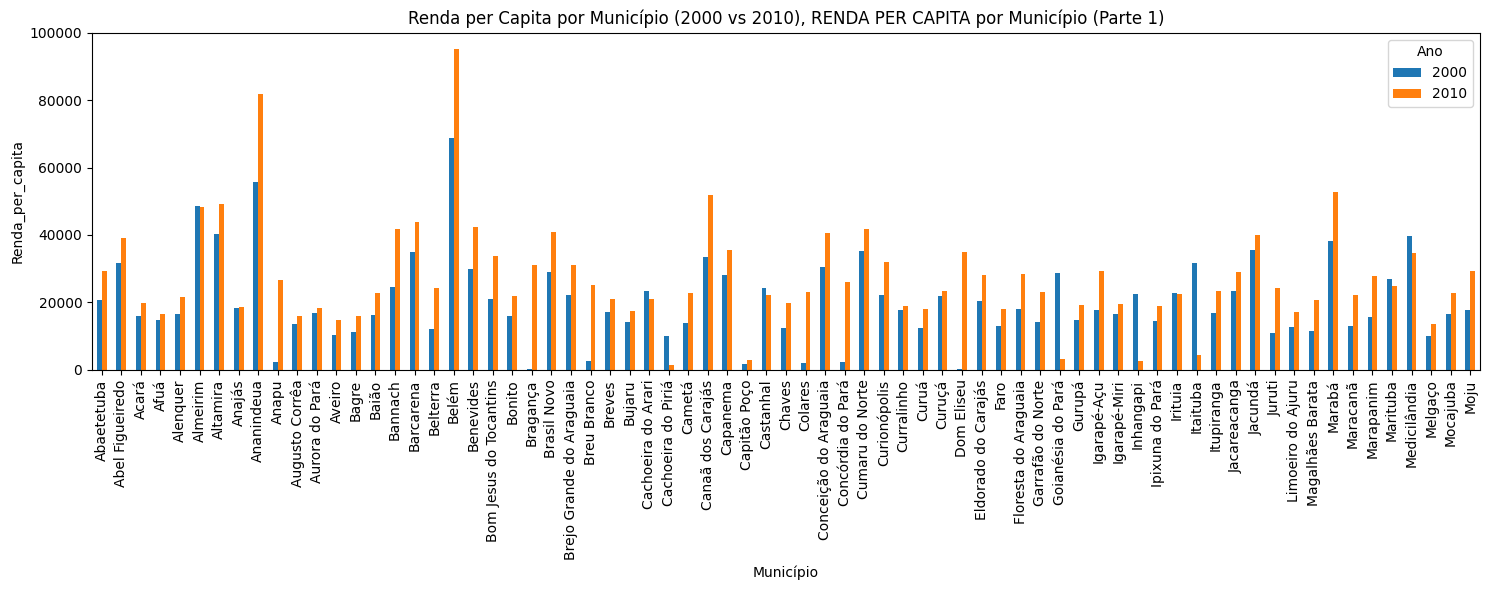

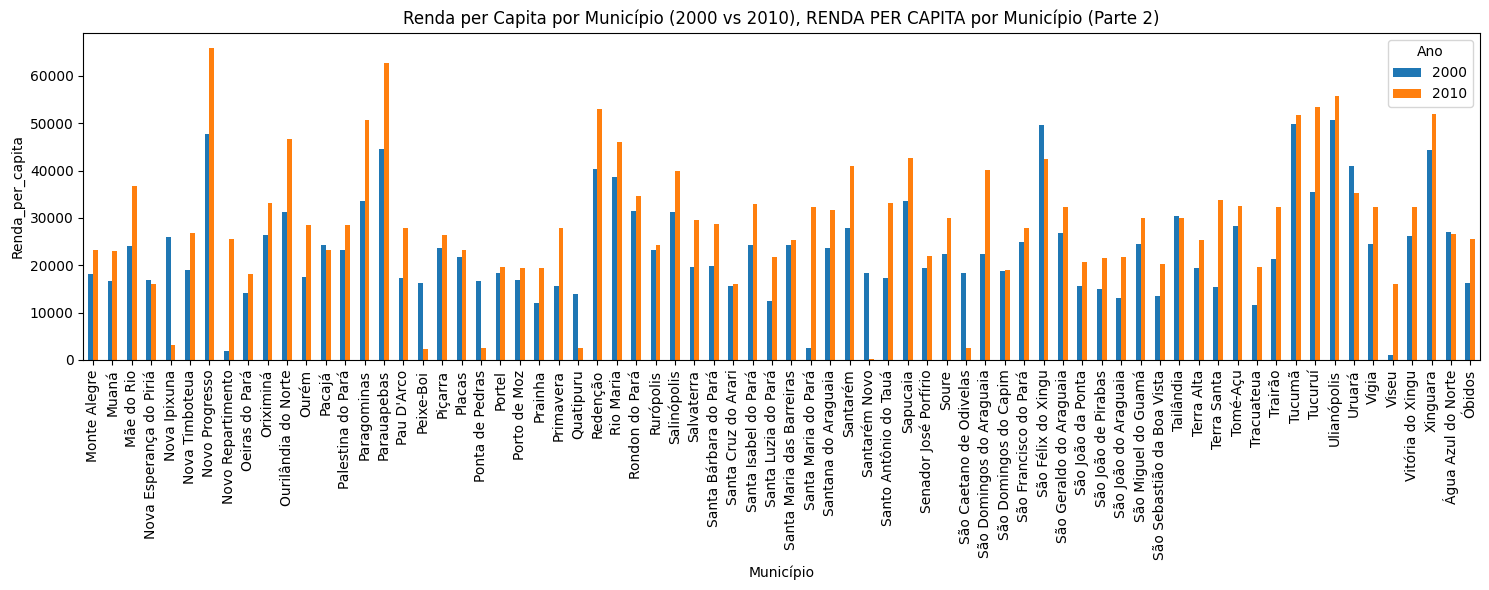

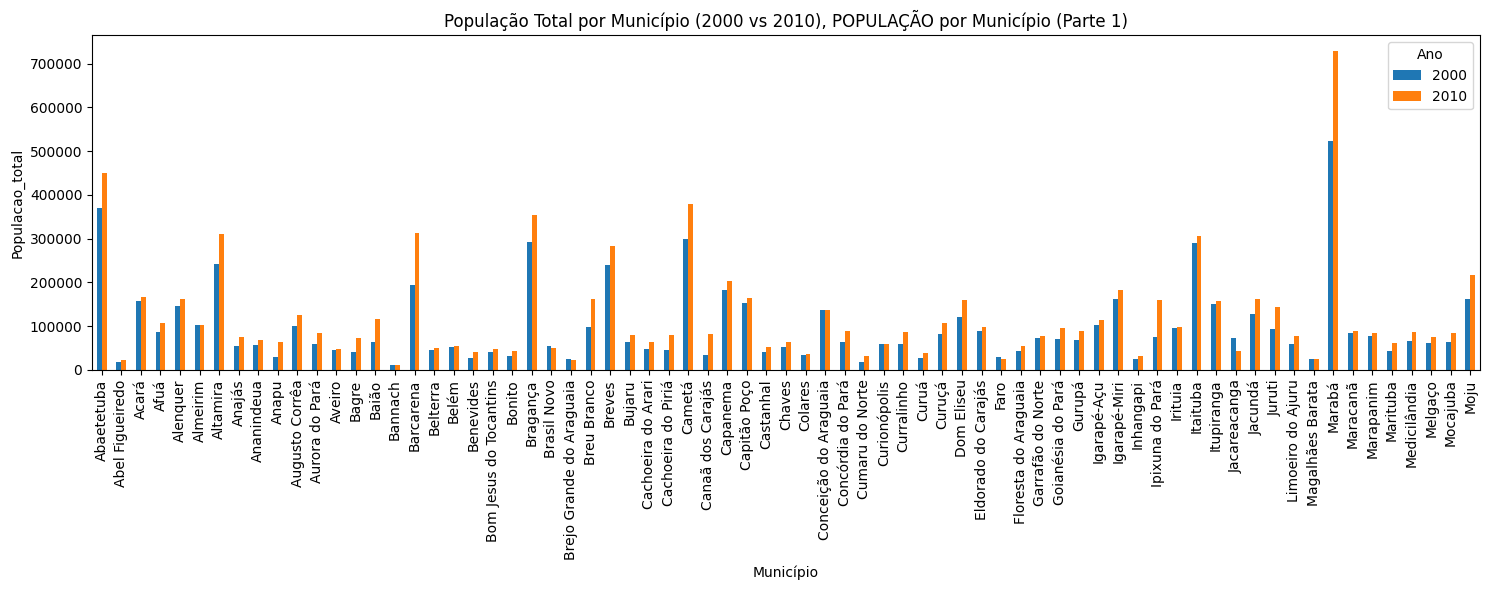

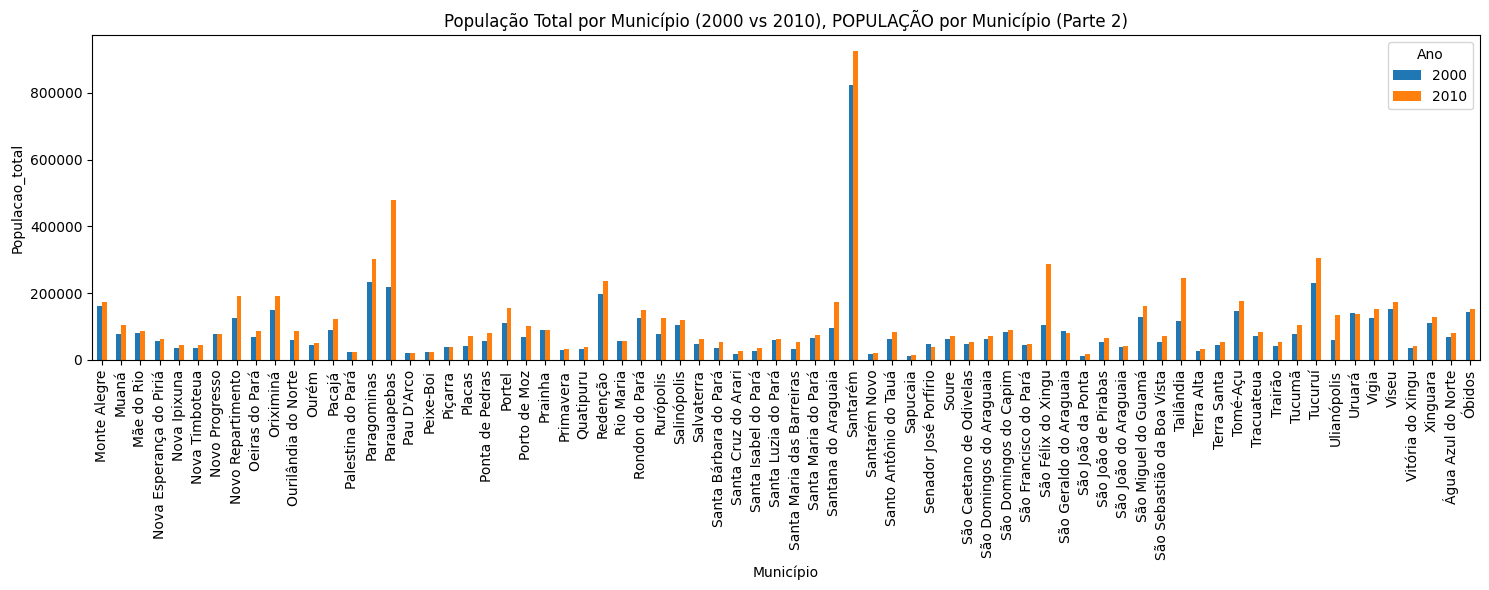

In [17]:
def plot_variavel_em_duas_partes(df, variavel, titulo):
    # Agrupar e pivotar
    df_var = df.groupby(['municipio', 'ano'])[variavel].mean().reset_index()
    df_pivot = df_var.pivot(index='municipio', columns='ano', values=variavel).reset_index()

    # Ordenar por município
    df_pivot = df_pivot.sort_values('municipio').reset_index(drop=True)

    # Dividir em duas partes
    metade = len(df_pivot) // 2
    df_parte1 = df_pivot.iloc[:metade]
    df_parte2 = df_pivot.iloc[metade:]

    # Plotar Parte 1
    df_parte1.plot(x='municipio', kind='bar', figsize=(15, 6))
    plt.title(f'{titulo} por Município (Parte 1)')
    plt.ylabel(variavel.capitalize())
    plt.xlabel('Município')
    plt.xticks(rotation=90)
    plt.legend(title='Ano', loc='upper right')
    plt.tight_layout()
    plt.show()

    # Plotar Parte 2
    df_parte2.plot(x='municipio', kind='bar', figsize=(15, 6))
    plt.title(f'{titulo} por Município (Parte 2)')
    plt.ylabel(variavel.capitalize())
    plt.xlabel('Município')
    plt.xticks(rotation=90)
    plt.legend(title='Ano', loc='upper right')
    plt.tight_layout()
    plt.show()

plot_variavel_em_duas_partes(df_completo, 'idhm', 'IDHM por Município (2000 vs 2010), IDHM')
plot_variavel_em_duas_partes(df_completo, 'ivs', 'IVS por Município (2000 vs 2010), IVS')
plot_variavel_em_duas_partes(df_completo, 'renda_per_capita', 'Renda per Capita por Município (2000 vs 2010), RENDA PER CAPITA')
plot_variavel_em_duas_partes(df_completo, 'populacao_total', 'População Total por Município (2000 vs 2010), POPULAÇÃO')

📝 A análise dos dados evidencia que o IDHM (Índice de Desenvolvimento Humano Municipal) apresentou crescimento na maioria dos municípios entre 2000 e 2010, indicando avanços em áreas como educação, saúde e renda. De forma complementar, o IVS (Índice de Vulnerabilidade Social) apresentou uma tendência de diminuição na maior parte das localidades, o que sugere uma redução das condições de vulnerabilidade da população ao longo do tempo. A renda per capita também apresentou crescimento significativo em grande parte dos municípios, refletindo uma possível melhora nas condições econômicas. Por fim, a população total registrou aumento na maioria dos municípios, o que pode estar relacionado tanto ao crescimento natural quanto à migração para essas regiões.

🛑 Com base nos gráficos analisados, é possível concluir que, entre os anos de 2000 e 2010, a maioria dos municípios apresentou avanços significativos em indicadores socioeconômicos, como o aumento do IDHM, da renda per capita e da população, além da redução do IVS, indicando uma melhora geral nas condições de vida da população. No entanto, esse progresso ocorreu paralelamente a um aumento no desmatamento em grande parte dos municípios, o que evidencia um possível conflito entre desenvolvimento socioeconômico e sustentabilidade ambiental. Esses resultados iniciais ressaltam a importância de políticas públicas que conciliem crescimento humano com a preservação dos recursos naturais.

Abaixo, foi feito o calculo da área total desmatada nos anos de 2000 e 2010. O objetivo é entender a evolução do desmatamento ao longo da década.

In [31]:
# Total de área desmatada em 2000
total_desmatado_2000 = df[df['ano'] == 2000]['desmatado'].sum()
print(f"Área total desmatada em 2000: {total_desmatado_2000:.2f} km²")

# Total de área desmatada em 2010
total_desmatado_2010 = df[df['ano'] == 2010]['desmatado'].sum()
print(f"Área total desmatada em 2010: {total_desmatado_2010:.2f} km²")

Área total desmatada em 2000: 190711.70 km²
Área total desmatada em 2010: 254345.40 km²


📝Em 2000, a área total desmatada foi de 190.711,70 km², enquanto em 2010 esse valor aumentou para 254.345,40 km². Isso representa um crescimento de aproximadamente 33,3% na área desmatada ao longo de dez anos. Esse aumento expressivo indica uma intensificação da pressão sobre os recursos naturais no estado.

Por fim usou-se o comando ProfileReport, da biblioteca pandas_profiling, para a geração automatizada de relatórios de análise exploratória dos dados referentes aos anos de 2000 e 2010. Tais relatórios ofereceram uma visão abrangente dos conjuntos de dados, contemplando estatísticas descritivas, distribuições de variáveis, correlações, identificação de valores ausentes, entre outras informações pertinentes para a compreensão e avaliação da qualidade e das características dos dados analisados.

In [18]:
# --- RELATÓRIO POR PROFILEREPORT ---
profile = ProfileReport(df_2000, title="Relatório de Análise Exploratória, 2000", explorative=True)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

📝 A análise exploratória automatizada realizada com o ProfileReport para os dados do ano de 2000 indicou alguns alertas relevantes sobre a estrutura do conjunto de dados. As variáveis área_total, desmatado e vegetação_natural mostraram correlação elevada entre si, o que é esperado e sugere que o tamanho dos municípios influencia diretamente na quantidade de vegetação remanescente e desmatamento registrado. Além disso, observou-se uma correlação significativa entre ivs, prosperidade_social e renda_per_capita, o que pode indicar que essas variáveis refletem aspectos similares das condições socioeconômicas.

📝 Em relação à distribuição dos dados, houve desequilíbrio nas variáveis categóricas como bioma, em que 72,8% dos registros pertencem a um único bioma, e prosperidade_social, com 89,9% de concentração em uma única categoria. Por fim, variáveis como área_total e vegetação_natural foram identificadas com valores únicos por município, o que é consistente com sua natureza descritiva local. Esses pontos são fundamentais para orientar análises futuras e para considerar possíveis ajustes ou reduções de dimensionalidade nos modelos analíticos.

In [19]:
profile = ProfileReport(df_2010, title="Relatório de Análise Exploratória, 2010", explorative=True)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

📝A análise exploratória automatizada aplicada à base de dados referente ao ano de 2010 revelou alertas importantes quanto à estrutura e características das variáveis. Assim como em 2000, foi observada alta correlação entre diversas variáveis. Por exemplo, área_total e desmatado mantêm forte correlação, indicando que o tamanho do território municipal continua influenciando os níveis de desmatamento. As variáveis idhm, ivs, renda_per_capita e prosperidade_social também se correlacionam fortemente entre si, sugerindo que esses indicadores socioeconômicos estão interligados e, em muitos casos, refletem dimensões semelhantes do desenvolvimento municipal. A população_total também apresentou alta correlação com a prosperidade_social, reforçando a ideia de que municípios mais populosos tendem a apresentar melhores indicadores sociais.

📝 Outro ponto relevante é o desequilíbrio na variável categórica bioma, com 72,8% dos registros concentrados em um único bioma, o que pode limitar algumas análises comparativas. Esses achados reforçam padrões identificados na análise de 2000 e fornecem subsídios para decisões em etapas posteriores do estudo.

🛑 A comparação entre as análises exploratórias dos dados de 2000 e 2010 evidencia a manutenção de padrões estruturais importantes ao longo da década. Em ambos os anos, observa-se uma forte correlação entre variáveis geográficas como área_total, desmatado e vegetação_natural, o que reafirma a influência direta do tamanho do município sobre o uso e a preservação do território. Do ponto de vista socioeconômico, a alta correlação entre ivs, prosperidade_social, renda_per_capita e, em 2010, também idhm e população_total, revela uma persistência nas relações entre desenvolvimento humano, condições sociais e estrutura populacional dos municípios.

🛑 Esses resultados apontam para a consistência estrutural dos dados ao longo do tempo e reforçam a necessidade de considerar tais características ao planejar análises estatísticas mais profundas e ao interpretar os resultados comparativos entre os dois períodos.

Para investigar possíveis relações lineares entre as variáveis numéricas do conjunto de dados de 2000, foi gerada uma matriz de correlação. O heatmap visualiza a intensidade dessas correlações, permitindo identificar variáveis fortemente relacionadas, o que pode indicar redundância ou dependência entre elas

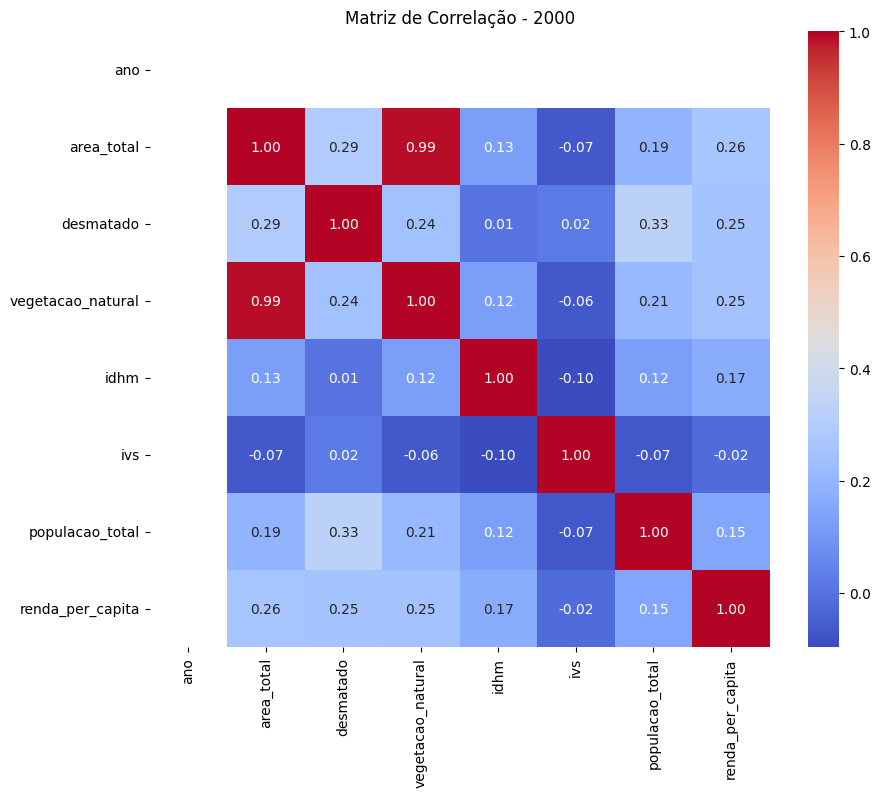

In [23]:
import seaborn as sns

# Filtrar apenas colunas numéricas
numeric_df = df_2000.select_dtypes(include='number')

# Matriz de correlação
correlation_matrix = numeric_df.corr()

# Gerar heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - 2000")
plt.show()

📝 A matriz de correlação para o ano de 2000 apresentada no heatmap revela algumas relações relevantes (e outras fracas) entre as variáveis socioeconômicas e ambientais dos municípios analisados:
* Correlação muito forte entre area_total e vegetacao_natural (0.99): indica que municípios com maior área total tendem a ter maior vegetação natural
* Correlação positiva moderada entre area_total e desmatado (0.29): sugere que municípios com maior área também podem ter sofrido mais desmatamento, embora essa relação não seja tão intensa.
* populacao_total apresenta uma correlação positiva leve com desmatado (0.33): indicando que municípios mais populosos tendem a apresentar um pouco mais de desmatamento, possivelmente por pressão urbana ou expansão agrícola.
* Correlação muito fraca ou quase nula entre idhm e as demais variáveis: especialmente com desmatado (0.01), ivs (-0.10), e populacao_total (0.12), indicando que, em 2000, o desenvolvimento humano não apresentava relação direta com essas variáveis
* renda_per_capita tem correlação leve com area_total, desmatado e vegetacao_natural (todos em torno de 0.25): pode indicar que municípios com áreas maiores (e consequentemente mais recursos naturais) tendem a ter uma renda per capita ligeiramente superior, embora o efeito seja pequeno.

A seguir, iremos gerar o heatmap para o ano de 2010. Em seguida, iremos efetuar o comparativo entre ambos os anos.

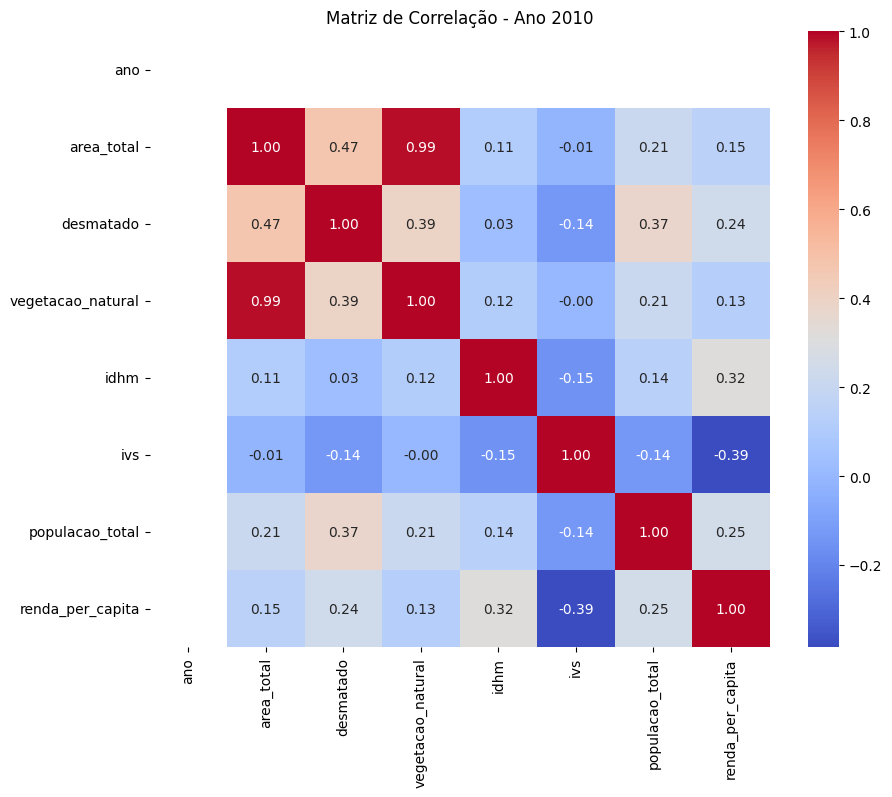

In [24]:
import seaborn as sns

# Seleciona apenas as colunas numéricas do dataframe de 2010
df_2010_numerico = df_2010.select_dtypes(include='number')

# Calcula a matriz de correlação
matriz_correlacao_2010 = df_2010_numerico.corr()

# Gera o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_2010, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Ano 2010")
plt.show()

📝 A matriz de correlação para o ano de 2010 revela algumas mudanças em relação ao ano de 2000, com destaque para as seguintes observações:
Correlação muito forte entre area_total e vegetacao_natural (0.99) continua evidente.

* A correlação entre area_total e desmatado aumentou (de 0.29 para 0.47), sugerindo que em 2010 a área do município estava ainda mais relacionada com o total desmatado, o que pode indicar expansão do desmatamento em áreas maiores.
* desmatado também apresenta correlação um pouco maior com populacao_total (0.37) em comparação a 2000, o que reforça a ideia de que municípios mais populosos tendem a sofrer maior pressão sobre seus recursos naturais.
* renda_per_capita mostra uma correlação mais forte com idhm (0.32) e negativa com ivs (-0.39), o que é esperado: maior renda está associada a maior desenvolvimento humano e menor vulnerabilidade social.
* populacao_total mantém correlações leves com renda_per_capita (0.25) e idhm (0.14), sugerindo uma relação um pouco mais clara entre o tamanho populacional e as condições socioeconômicas.

🛑 A comparação entre as matrizes de correlação dos anos de 2000 e 2010 revela uma intensificação nas relações entre variáveis socioeconômicas e ambientais ao longo da década. Em ambos os anos, a forte correlação entre área total e vegetação natural permanece praticamente inalterada, refletindo uma relação estrutural nos municípios analisados. No entanto, observa-se um aumento significativo na correlação entre área total e desmatamento (de 0.29 para 0.47), bem como entre desmatamento e população total (de 0.33 para 0.37), indicando que o crescimento populacional e a expansão territorial passaram a exercer maior pressão sobre os recursos naturais. Além disso, em 2010, a renda per capita passou a se correlacionar de forma mais clara com o IDHM (0.32) e negativamente com o IVS (-0.39), apontando para uma maior coesão entre desenvolvimento econômico e indicadores sociais, relação que era pouco expressiva em 2000.

🛑 Esses resultados sugerem que, ao longo dos anos, houve um fortalecimento das interações entre aspectos demográficos, econômicos e ambientais, revelando dinâmicas mais intensas entre crescimento urbano, bem-estar social e impacto ambiental.

Os gráficos a seguir comparam os valores de IDHM e área desmatada para cada município, divididos em duas metades para facilitar a visualização. Para cada ano (2000 e 2010), são gerados dois gráficos de barras agrupadas com as variáveis lado a lado.


Top 10 municípios com maior desmatado - 2000
['Paragominas', 'São Félix do Xingu', 'Marabá', 'Santana do Araguaia', 'Cumaru do Norte', 'Rondon do Pará', 'Água Azul do Norte', 'Santa Maria das Barreiras', 'Itaituba', 'Itupiranga']


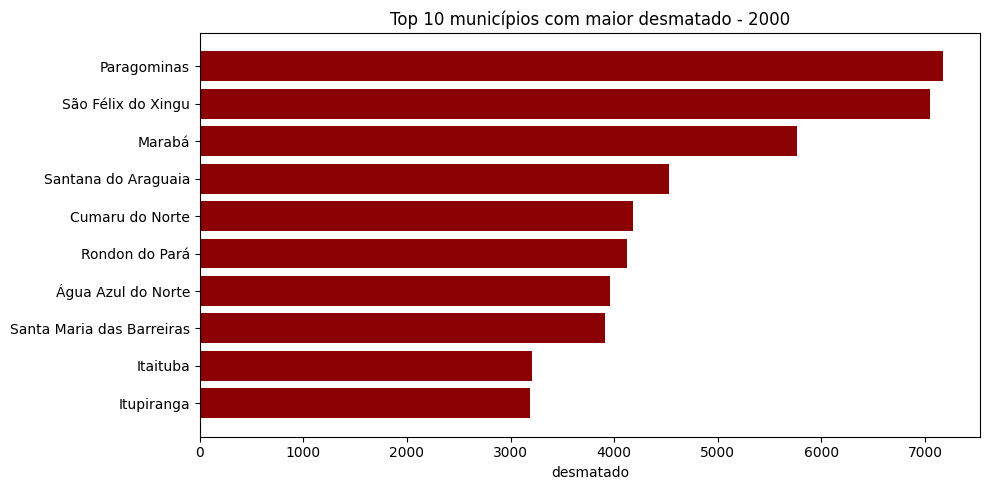


Top 10 municípios com menor desmatado - 2000
['Santa Cruz do Arari', 'Limoeiro do Ajuru', 'Ponta de Pedras', 'São Sebastião da Boa Vista', 'Soure', 'Salvaterra', 'Quatipuru', 'Marituba', 'Breves', 'Colares']


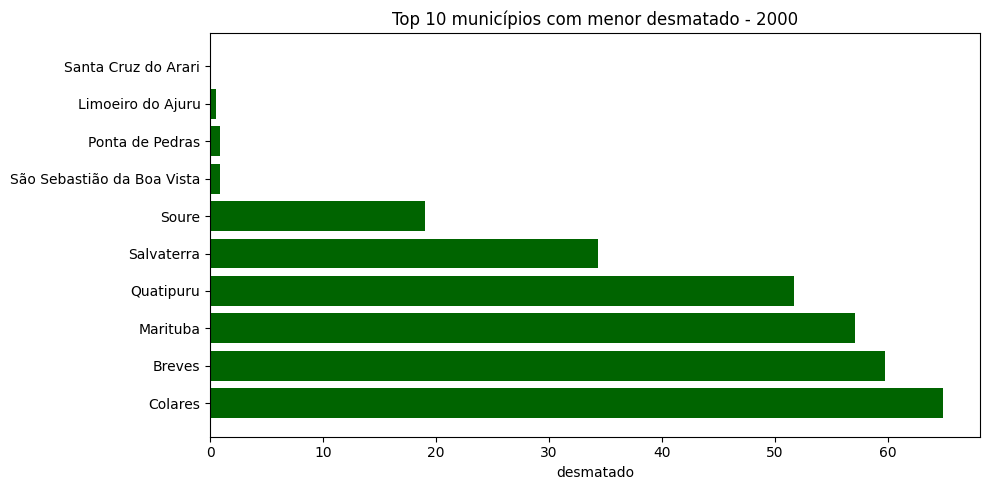


Top 10 municípios com maior idhm - 2000
['Belém', 'Santarém', 'Barcarena', 'Parauapebas', 'Tucuruí', 'Marabá', 'Altamira', 'Capanema', 'Almeirim', 'Colares']


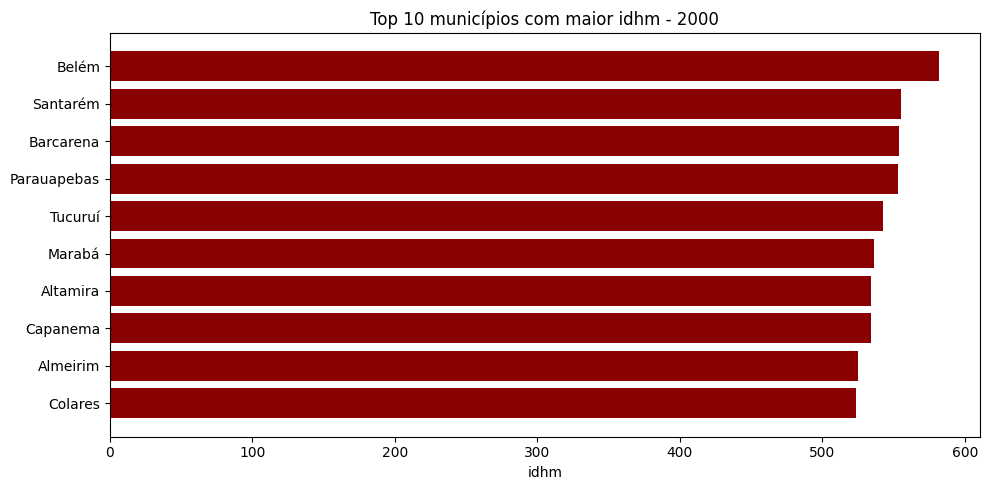


Top 10 municípios com menor idhm - 2000
["Pau D'Arco", "Pau D'Arco", 'Abaetetuba', 'Melgaço', 'Garrafão do Norte', 'Afuá', 'Muaná', 'Acará', 'Porto de Moz', 'Portel']


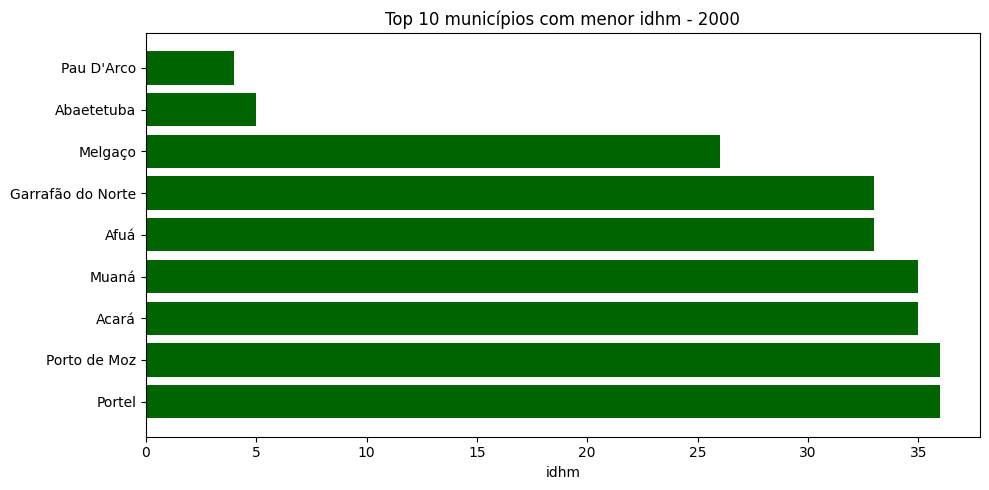


Top 10 municípios com maior desmatado - 2010
['São Félix do Xingu', 'Paragominas', 'Marabá', 'Cumaru do Norte', 'Novo Repartimento', 'Santana do Araguaia', 'Altamira', 'Santa Maria das Barreiras', 'Rondon do Pará', 'Novo Progresso']


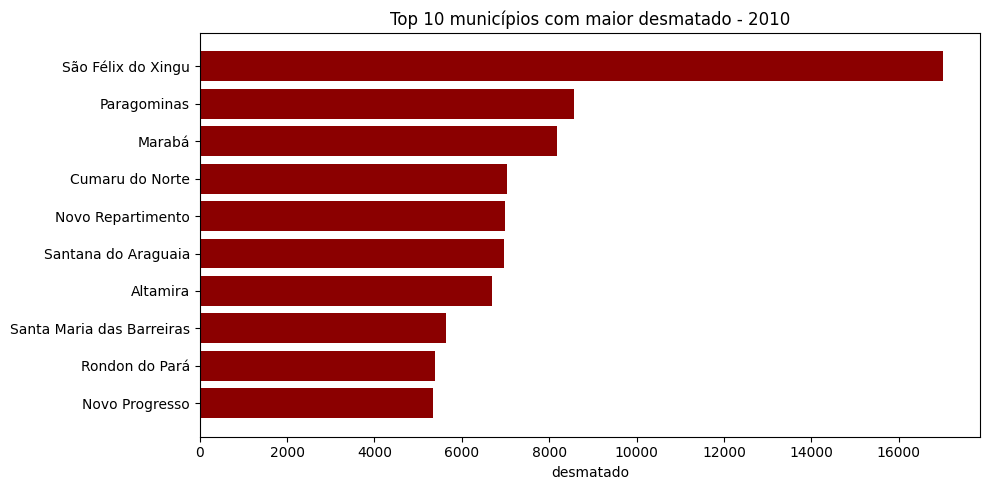


Top 10 municípios com menor desmatado - 2010
['Santa Cruz do Arari', 'Soure', 'Ponta de Pedras', 'Limoeiro do Ajuru', 'Marituba', 'Cachoeira do Arari', 'Quatipuru', 'Ananindeua', 'Colares', 'Chaves']


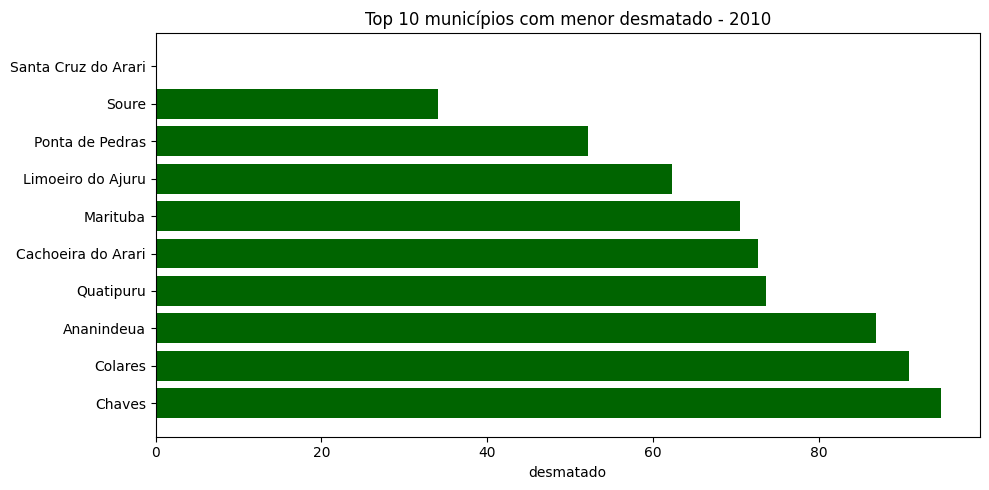


Top 10 municípios com maior idhm - 2010
['Ananindeua', 'Parauapebas', 'Belém', 'Santarém', 'Marituba', 'Canaã dos Carajás', 'Novo Progresso', 'Redenção', 'Redenção', 'Marabá']


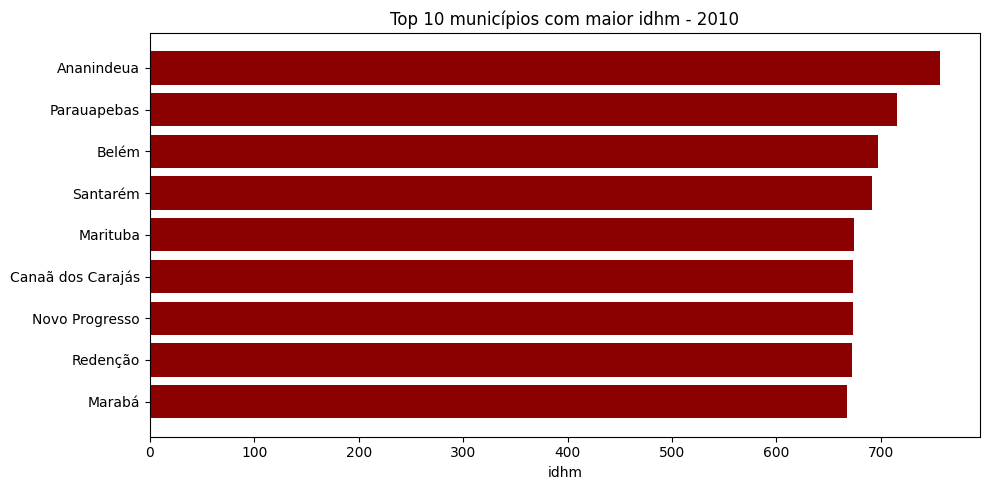


Top 10 municípios com menor idhm - 2010
['Bragança', 'Augusto Corrêa', 'Limoeiro do Ajuru', 'Cumaru do Norte', 'São João do Araguaia', 'Eldorado do Carajás', 'Goianésia do Pará', 'Maracanã', 'Peixe-Boi', 'Conceição do Araguaia']


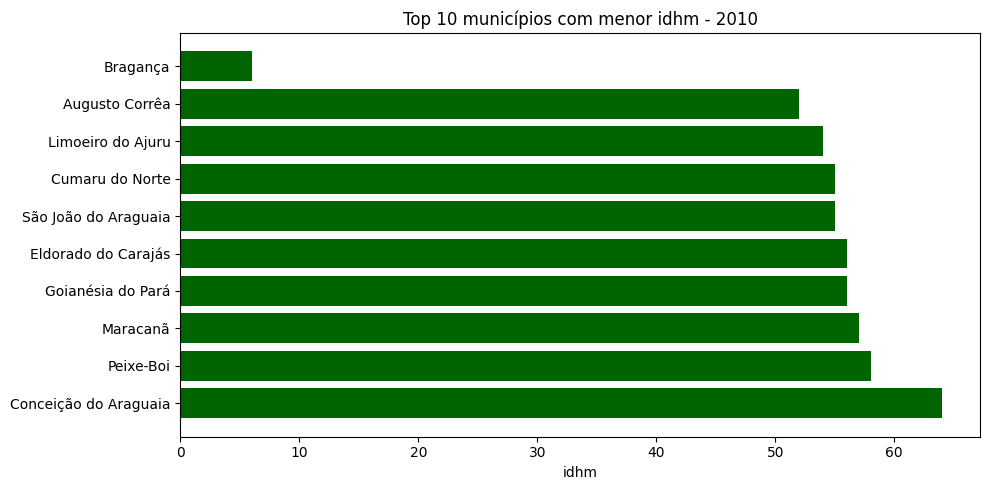

In [26]:
def plot_top_bottom(df, coluna, ano):
    # Ordena
    top10 = df.sort_values(by=coluna, ascending=False).head(10)
    bottom10 = df.sort_values(by=coluna, ascending=True).head(10)

    # Imprime nomes dos Top 10
    print(f'\nTop 10 municípios com maior {coluna} - {ano}')
    print(top10['municipio'].tolist())

    # Gráfico top 10
    plt.figure(figsize=(10, 5))
    plt.barh(top10['municipio'], top10[coluna], color='darkred')
    plt.xlabel(coluna)
    plt.title(f'Top 10 municípios com maior {coluna} - {ano}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Imprime nomes dos Bottom 10
    print(f'\nTop 10 municípios com menor {coluna} - {ano}')
    print(bottom10['municipio'].tolist())

    # Gráfico bottom 10
    plt.figure(figsize=(10, 5))
    plt.barh(bottom10['municipio'], bottom10[coluna], color='darkgreen')
    plt.xlabel(coluna)
    plt.title(f'Top 10 municípios com menor {coluna} - {ano}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# -------- Ano 2000 --------
plot_top_bottom(df_2000, 'desmatado', 2000)
plot_top_bottom(df_2000, 'idhm', 2000)

# -------- Ano 2010 --------
plot_top_bottom(df_2010, 'desmatado', 2010)
plot_top_bottom(df_2010, 'idhm', 2010)

📝**2000:** Maiores desmatamentos ocorreram em municípios como Paragominas, São Félix do Xingu e Marabá. Menores desmatamentos aparecem em ilhas e regiões de várzea, como Santa Cruz do Arari, Soure, Breves e Ponta de Pedras.

📝**2010:** Novo Progresso, Altamira e Novo Repartimento entram na lista. Novo Progresso, Altamira e Novo Repartimento entram na lista. Houve menos desmatamento em cidades como Santa Cruz do Arari, Soure e Ponta de Pedras.

📝**2000:** Melhores IDHMs estão em grandes centros urbanos como Belém e Santarém. Piores IDHMs concentram-se em municípios como Melgaço, Portel, Afuá, e Muaná.

* 🔎 Observação: O município de Colares aparece entre os que menos desmataram e entre os que tiveram melhor IDHM. Isso sugere que é possível compatibilizar qualidade de vida com preservação ambiental.

📝**2010:** Os melhores IDHMs em 2010 envolvem novamente Belém, Parauapebas, Santarém, além de novas entradas como Canaã dos Carajás e Novo Progresso. Piores IDHMs incluem Bragança, Augusto Corrêa e Limoeiro do Ajuru.

* 🔎 Observação: Cumaru do Norte aparece entre os que mais desmataram e os que tiveram menor IDHM neste ano de 2010, o que indica que o desmatamento não está trazendo melhoria na qualidade de vida local.

# 🏁 4. Conclusão

Este trabalho realizou uma análise estatística exploratória sobre dados socioeconômicos e indicadores de desmatamento dos municípios do Estado do Pará, com foco comparativo entre os anos de 2000 e 2010. O principal objetivo foi compreender como o progresso social e o impacto ambiental se relacionam dentro do contexto amazônico, marcado por desafios complexos de desenvolvimento sustentável.

A análise evidenciou que o desmatamento apresentou um crescimento significativo no período analisado, com um aumento aproximado de 33,3% em relação ao ano de 2000. Isso reforça a preocupação quanto à continuidade de práticas ambientais predatórias e à necessidade de atuação urgente para frear o avanço da degradação ambiental.

Outro ponto importante observado é que diversos municípios com expressivo crescimento no Índice de Desenvolvimento Humano Municipal (IDHM), como Paragominas, Marabá e São Félix do Xingu, também figuram entre os que mais desmatam no estado. Tal correlação sugere que o avanço em indicadores sociais e econômicos pode estar ocorrendo, em muitos casos, à custa da conservação ambiental. Esse padrão evidencia uma relação preocupante de co-dependência entre desenvolvimento humano e impactos ambientais negativos.

Dessa forma, os resultados obtidos apontam para a necessidade de repensar os modelos de desenvolvimento adotados no Pará, promovendo políticas públicas que conciliem crescimento socioeconômico com preservação ambiental.
